# Tarefa - Algoritmo Genético

## Problema das N-Rainhas

### Dupla:
João Pedro de Paula Oliveira - DRE: 113054857

Rafael da Silva Fernandes - DRE: 117196229

##1. **Modelagem do Indivíduo**

### (a) Utilize a mesma representação de tabuleiro usada na tarefa do Hill Climbing.

Um tabuleiro com N rainhas será representado por meio de uma lista. 

Por exemplo, a lista [3,2,1,2] representa um tabuleiro 4 x 4, em que o índice 0 da lista significa que na primeira coluna, contando da esquerda para a direita, há uma rainha na quarta linha, contando de cima para baixo. 

Dessa forma, os valores possíveis da lista vão de 0 até (N - 1).

###(b) Proponha uma representação binária para o tabuleiro.

Como o tamanho de tabuleiro que usaremos na tarefa é 2^n, vamos considerar a representação binária dos indivíduos como T números de base 2 com n bits, onde T é o tamanho do tabuleiro, concatenados em sequência.

Utilizando a lista [3,2,1,2] citada no item acima como exemplo, o indivíduo seria 11100110. O tabuleiro tem dimensão n = 2, portanto possui tamanho T = 2^2 = 4, então o indivíduo é formado por 4 elementos de 2 bits, 11 10 01 e 10, que são as representações binárias de 3 2 1 2. As posições i, para as quais (i mod n = 1), indicam o início de outro elemento da lista na representação em base 10.

Agora considerando um tabuleiro de tamanho 8, temos que n = 3 e T = 8, pois 2^3 = 8. Usando a lista [0,4,6,3,5,6,1,7] como base, temos o indivíduo correspondente sendo 000010110011101110001111, que são 8 elementos de 3 bits cada. Note que nas posições 1, 4, 7, 10, 13, 16, 19 e 22 temos o início de um novo elemento da lista original, pois estes índices são verdade para a expressão (i mod 3 = 1).


==> Trabalhei em cima dessa lógica mas admito que não entendi ela

## Implementação

In [381]:
N = 4
# N = 8
# N = 16
# N = 32

In [382]:
import random

def monta_tabuleiro(N):

    tabuleiro = []

    # Gera uma lista de tamanho N, com valores de 0 a (N-1)
    # indicando as posições das rainhas, contando de cima para baixo
    for i in range(N):
        tabuleiro.append(random.randint(0, (N - 1)))

    return tabuleiro


# Variável global para o tabuleiro
tabuleiro = monta_tabuleiro(N)
print("Vamos trabalhar com o tabuleiro: " + str(tabuleiro))

Vamos trabalhar com o tabuleiro: [3, 2, 1, 0]


In [383]:
import math

def tabuleiro_para_binario(tabuleiro):

    n = int(math.log(N, 2))
    individuo = ""

    for i in range(len(tabuleiro)):

        elemento_tabuleiro = tabuleiro[i]

        # print((n - len(bin(elemento_tabuleiro)[2:])) * "0" + bin(elemento_tabuleiro)[2:])
        individuo += (n - len(bin(elemento_tabuleiro)[2:])) * "0" + bin(elemento_tabuleiro)[2:]
        
    return individuo


print("O tabuleiro " + str(tabuleiro) + " possui a seguinte representação em binário: " 
      + str(tabuleiro_para_binario(tabuleiro)))

O tabuleiro [3, 2, 1, 0] possui a seguinte representação em binário: 11100100


##2. **Geração População Inicial**

### Defina uma função que dado o tamanho n de uma população, gera aleatoriamente um conjunto de n indivíduos. A função deve funcionar para os dois tipos de indivíduos definidos no item anterior.

In [384]:
# Essa função faz n chamadas da função monta_tabuleiro, adicionando os
# tabuleiros criados no array "pop_inicial_lista"
# Recebe como parâmetros o número de indivíduos da população e
# o tamanho do tabuleiro.

# Respondi sua observação quanto a não ter se atentado ao enunciado
# Ele diz que a função deve funcionar para os dois tipos de indivíduos
# Eu entendi isso como "Utilize a mesma função para gerar populações com os dois tipos de indivíduos"
# Não sei se minha interpretação está correta
# De qualquer forma, fiz com que a linha 21 transformasse a população gerada na linha 20 em binário
# Imprimo as duas listas nas linhas 23 e 24 para testar, mas não sei o que a função deveria retornar
# Por enquanto estou retornando a lista em decimal, e caso necessário a transformo em binário

def cria_pop_inicial_lista(n, N):

  pop_inicial_lista = []
  pop_inicial_binaria = []

  for i in range(n):
    pop_inicial_lista.append(monta_tabuleiro(N))
    pop_inicial_binaria.append(tabuleiro_para_binario(pop_inicial_lista[i]))
  
#   print(pop_inicial_lista)
#   print(pop_inicial_binaria)

  return pop_inicial_lista


pop_inicial_lista = cria_pop_inicial_lista(10, N)
pop_inicial_lista

[[1, 1, 0, 0],
 [2, 3, 3, 2],
 [1, 3, 1, 2],
 [3, 0, 2, 1],
 [1, 3, 3, 3],
 [1, 0, 3, 3],
 [2, 1, 1, 3],
 [0, 3, 1, 0],
 [1, 3, 1, 3],
 [0, 3, 2, 1]]

In [385]:
# Essa função percorre todos os elementos da versão em lista da população
# inicial e os converte para a representação binária, guardando os elementos
# no array "pop_inicial_binaria"

import math

def cria_pop_inicial_binaria(N):

  # Preciso saber quantos bits têm os elementos que irão compor o indivíduo
  bits = str(int(math.log2(N)))

  # Será minha variável de saída no return
  pop_inicial_binaria = []

  # Instancio localmanente a variável global
  pop_inicial = pop_inicial_lista.copy()

  # Minha população é composta de indivíduos
  for individuo in pop_inicial:

    # reinicializo o array para a próxima iteração
    array_temp = []

    # Meus indivíduos são compostos por colunas. Aqui converto o valor de cada
    # coluna de int para a string da representação binária
    for coluna in individuo:
    
      # format é um método de string, converte arg[0] para o formato de arg[1],
      # que defini como sendo um binário de "bits" casas.
      elemento_binario = format(coluna, '0' + bits + 'b')

      # array_temp só serve para guardar todos os elementos convertidos no loop.
      # Por enquanto, eu ainda tenho um array de representações binárias, mas 
      # meu indivíduo deveria ser apenas uma string só. Ao sair do for, os 
      # elementos da lista serão unidos nessa única string.
      array_temp.append(elemento_binario)
    
    # Saí do for mais interno, agora posso unir todos os elementos em um único
    # indivíduo e colocá-lo no array pop_inicial_binaria. ''.join concatena
    # todos os elementos do array passado como parâmetro com o caractere entre 
    # aspas entre cada elemento, no caso, o caractere que passei é a string vazia
    individuo_binario = ''.join(array_temp)
    pop_inicial_binaria.append(individuo_binario) 

  return pop_inicial_binaria

binario = cria_pop_inicial_binaria(N)
binario

['01010000',
 '10111110',
 '01110110',
 '11001001',
 '01111111',
 '01001111',
 '10010111',
 '00110100',
 '01110111',
 '00111001']

Percebi que não me atentei ao enunciado... Ele pede para fazer uma função que funcione com os dois tipos de indivíduos. Eu fiz duas funções, mas a segunda é feita em função da primeira. Os índices dos arrays pop_inicial_lista e pop_inicial_binaria vão retornar o mesmo indivíduo, porém em representações diferentes.

==> Ele quer então que geremos uma população aleatória em decimal, e OUTRA população aleatória em binário? A interpretação desse enunciado que está me complicando... perguntei no grupo e o monitor disse: "pode fazer ela receber um parâmetro especificando o tipo de indivíduo que quem chamou quer na resposta, e retornar n desses", o que acha?

E eu posso ter entendido errado esse código, então desculpa qualquer coisa, mas ele está fazendo o mesmo que a célula acima na linha 21?

##3. **Operadores: Para os dois tipos de indivíduos definidos acima:**

###(a) Defina a função de adaptação usada para avaliar um tabuleiro T.

In [386]:
# Caso tenham rainhas na mesma linha, aumenta o valor da variável "ataque"
def checa_linha(tabuleiro):

    ataques = 0

    for coluna in range(len(tabuleiro)):

        linha_rainha = tabuleiro[coluna]

        for coluna_vizinha in range(1, len(tabuleiro) - coluna):

            posicao_coluna_atual = coluna + coluna_vizinha

            if tabuleiro[posicao_coluna_atual] == linha_rainha:
                ataques += 1
    
    return ataques

In [387]:
# Para cada rainha, verifica se há outras rainhas em sua diagonal superior
def checa_diagonal_superior(tabuleiro):

    ataques = 0

    for coluna in range(len(tabuleiro)):

        linha_rainha = tabuleiro[coluna]
        # como há a restrição de apenas uma rainha por coluna, só é preciso verificar as colunas à esquerda
        for coluna_vizinha in range(1, len(tabuleiro) - coluna):

            posicao_coluna_atual = coluna + coluna_vizinha

            if tabuleiro[posicao_coluna_atual] == (linha_rainha - coluna_vizinha):
                ataques += 1
    
    return ataques

In [388]:
# Para cada rainha, verifica se há outras rainhas em sua diagonal inferior
def checa_diagonal_inferior(tabuleiro):

    ataques = 0

    for coluna in range(len(tabuleiro)):

        linha_rainha = tabuleiro[coluna]

        for coluna_vizinha in range(1, len(tabuleiro) - coluna):
            # como há a restrição de apenas uma rainha por coluna, só é preciso verificar as colunas à esquerda
            posicao_coluna_atual = coluna + coluna_vizinha

            if tabuleiro[posicao_coluna_atual] == (linha_rainha + coluna_vizinha):
                ataques += 1
    
    return ataques

In [389]:
# Heurística h(x). Conta a quantidade total de ataques no tabuleiro, fazendo o somatório de todos os ataques possíveis
# nas linhas e diagonais de cada rainha.
def conta_ataques(tabuleiro):

    total_ataques = 0
    ataques_diagonal_total = 0

    ataques_diagonal_superior = checa_diagonal_superior(tabuleiro)
    ataques_diagonal_inferior = checa_diagonal_inferior(tabuleiro)

    ataques_diagonal_total += ataques_diagonal_superior + ataques_diagonal_inferior
    
    total_ataques += checa_linha(tabuleiro) + ataques_diagonal_total

    return total_ataques

In [390]:
# Heurística h(x). Conta a quantidade total de ataques no tabuleiro, fazendo o somatório de todos os ataques possíveis
# nas linhas e diagonais de cada rainha.
def conta_ataques(tabuleiro):

    total_ataques = 0
    ataques_diagonal_total = 0

    ataques_diagonal_superior = checa_diagonal_superior(tabuleiro)
    ataques_diagonal_inferior = checa_diagonal_inferior(tabuleiro)

    ataques_diagonal_total += ataques_diagonal_superior + ataques_diagonal_inferior
    
    total_ataques += checa_linha(tabuleiro) + ataques_diagonal_total

    return total_ataques

In [391]:
# print(checa_linha(tabuleiro))
# print(checa_diagonal_superior(tabuleiro))
# print(checa_diagonal_inferior(tabuleiro))
print("O total de ataques para o tabuleiro " + str(tabuleiro) 
      + " é igual à " + str(conta_ataques(tabuleiro)))
print("Sendo o tabuleiro " + str(tabuleiro) + " o indivíduo "
      + str(tabuleiro_para_binario(tabuleiro)))

O total de ataques para o tabuleiro [3, 2, 1, 0] é igual à 6
Sendo o tabuleiro [3, 2, 1, 0] o indivíduo 11100100



[Comentário informal] Para nós, quanto mais perto de 0 um valor da lista_funcao_avaliacao for melhor, pois significa que estamos perto de encontrar uma solução (onde não há ataques entre rainhas), então eu mudei nossa função de avaliação, ao invés do valor negativo do número de ataques, para (1/ número de ataques + 1), assim quanto mais ataques, menor o valor da função avaliação. Tirei essa ideia da página 15 do slide 1 de algoritmo 
genético.

Essas variáveis que mencionei aparecem nas células abaixo.

In [392]:
def calcula_f(tabuleiro):
    return 1/ (conta_ataques(tabuleiro) + 1)

###(b) Defina a função que dada uma população P, constrói a roleta viciada correspondente a P.

In [393]:
def funcao_avaliacao_pop_inicial():

    lista_populacao = pop_inicial_lista.copy()
    lista_funcao_avaliacao = []

    for i in range(len(lista_populacao)):
        # print(calcula_f(lista_populacao[i]))
        lista_funcao_avaliacao.append(calcula_f(lista_populacao[i]))

    return lista_funcao_avaliacao


lista_funcao_avaliacao = funcao_avaliacao_pop_inicial()
lista_funcao_avaliacao

[0.25,
 0.2,
 0.3333333333333333,
 0.5,
 0.2,
 0.25,
 0.25,
 0.3333333333333333,
 0.3333333333333333,
 0.2]

In [394]:
def cria_proporcao_roleta():

    soma = 0
    lista_proporcao_roleta = []

    for i in range(len(lista_funcao_avaliacao)):
        soma += lista_funcao_avaliacao[i]

    for i in range(len(lista_funcao_avaliacao)):
        porcentagem = lista_funcao_avaliacao[i]/ soma * 100
        # print(round(porcentagem, 2))
        porcentagem_arredondada = round(porcentagem, 2)
        lista_proporcao_roleta.append(porcentagem_arredondada)
    
    return lista_proporcao_roleta


lista_proporcao_roleta = cria_proporcao_roleta()
lista_proporcao_roleta

[8.77, 7.02, 11.7, 17.54, 7.02, 8.77, 8.77, 11.7, 11.7, 7.02]

[Comentário informal] Aqui eu chamo os indivíduos de 1 à 10, como o professor faz no slide. Não acho que seja uma representação ruim, mas quando gerarmos a tabela para a população intermediária, não sei se ele vai colocar
5 - 7 - 5 - 8 - 9 - 5 - 5 - 7, por exemplo, ou se ele vai numerar de 1 à 10 também. Talvez criar um dicionário para a população inicial funcione
{1: [individuo1], 2: [individuo2]}, e aí na tabela da população intermediária nós já teríamos que o [individuo5] precisa aparecer como "5", mesmo ele aparecendo primeiro no exemplo acima. Infelizmente não tive tempo para testar essa ideia.

In [418]:
import pandas as pd

populacao_dataframe = pd.DataFrame(lista_funcao_avaliacao)
populacao_dataframe["Proporção da roleta"] = lista_proporcao_roleta
populacao_dataframe.index = np.arange(1, len(populacao_dataframe) + 1)
populacao_dataframe.rename_axis("Indivíduo", axis="columns", inplace=True)
populacao_dataframe.rename(columns= {0: "Função de avaliação"}, inplace=True)
populacao_dataframe

Indivíduo,Função de avaliação,Proporção da roleta
1,0.250000,8.77
2,0.200000,7.02
3,0.333333,11.70
4,0.500000,17.54
5,0.200000,7.02
6,0.250000,8.77
7,0.250000,8.77
8,0.333333,11.70
9,0.333333,11.70
10,0.200000,7.02


([<matplotlib.patches.Wedge at 0x7f3cbbebbe50>,
 [Text(1.0585211870073838, 0.29922048167944565, '1'),
  Text(0.7885537536721133, 0.7669308818724281, '2'),
  Text(0.23065159092849627, 1.0755463000736667, '3'),
  Text(-0.7147277673957729, 0.8361604023830919, '4'),
  Text(-1.0953440896546316, 0.10110057002147274, '5'),
  Text(-1.011459227382013, -0.43237741770793414, '6'),
  Text(-0.6354157542444505, -0.8979124786180199, '7'),
  Text(0.029885529150700474, -1.0995939501231273, '8'),
  Text(0.7595906298299466, -0.7956268441138378, '9'),
  Text(1.07336273097079, -0.24060849478546603, '10')],
 [Text(0.5773751929131183, 0.16321117182515216, '8.77%'),
  Text(0.43012022927569815, 0.4183259355667789, '7.02%'),
  Text(0.12580995868827066, 0.5866616182219999, '11.70%'),
  Text(-0.3898515094886034, 0.45608749220895917, '17.54%'),
  Text(-0.5974604125388898, 0.05514576546625785, '7.02%'),
  Text(-0.5517050331174617, -0.2358422278406913, '8.77%'),
  Text(-0.3465904114060639, -0.4897704428825563, '8.77

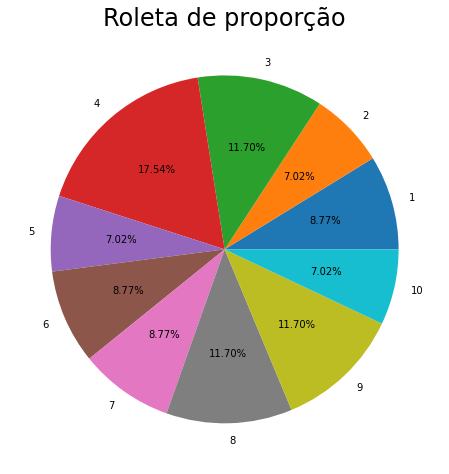

In [415]:
import matplotlib.pyplot as plt
import numpy as np

lista_proporcao_roleta = np.array(lista_proporcao_roleta)
plt.figure(1, figsize=(16, 8))
plt.title('Roleta de proporção', fontsize=24)

plt.pie(lista_proporcao_roleta, 
        labels = np.arange(1, len(lista_funcao_avaliacao) + 1),
        autopct='%1.2f%%')

###(c) Defina a função que dada uma população P contrói uma população intermediária correspondente a P. (**seleção**)


In [416]:
# Ideia:
# Colocar em uma nova lista um número X de vezes que determinado indivíduo aparece com base na sua proporção
# Por exemplo
# O indivíduo 1 possui 10,63% de proporção da roleta
# Transformamos esse 10,63 para int, que se torna 11
# Então, acrescentamos 11 vezes na lista nova o indivíduo 1
# Dessa forma, a lista 1 vai ter aproximadamente 100 elementos no final
# E então fazemos um rand dentro dessa lista nova 
# Obtendo assim a população intermediária
# A probabilidade de um indivíduo com maior proporção da roleta ser selecionado se torna natural
# Já que isso significa que ele aparecerá um maior número de vezes na nova lista
# Chamo essa nova lista de populacao_intermediaria para ficar de acordo com os slides

def selecao():

    populacao_com_base_na_proporcao = []
    populacao_intermediaria = []

    for individuo in range(len(pop_inicial_lista)):
        for proporcao in range(int(round(lista_proporcao_roleta[individuo], 0))):
            # print(pop_inicial_lista[individuo])
            populacao_com_base_na_proporcao.append(pop_inicial_lista[individuo])
    
    # print(populacao_com_base_na_proporcao)

    for i in range(len(pop_inicial_lista)):
        individuo_aleatorio = random.randint(0, len(populacao_com_base_na_proporcao))
        populacao_intermediaria.append(populacao_com_base_na_proporcao[individuo_aleatorio])

    return populacao_intermediaria


selecao()

[[1, 3, 1, 2],
 [3, 0, 2, 1],
 [2, 3, 3, 2],
 [1, 3, 1, 3],
 [1, 3, 1, 2],
 [1, 1, 0, 0],
 [1, 3, 1, 2],
 [0, 3, 1, 0],
 [1, 3, 1, 3],
 [1, 3, 1, 2]]

###(d) Defina a função que faz o crossover entre dois indivíduos. (**crossover**)

In [398]:
# Função que realiza o crossover entre dois indivíduos. A probabilidade de 
# crossover é definida na chamada da função, não no método em si.
# =====> em aula ele disse que 70~80% de crossover
# A ideia da função é pegar dois indivíduos, sortear um número entre 1 e 
# len(individuo) -1, pegar a substring de 0 até o indice sorteado e concatenar com
# a substring de indice até fim do outro indivíduo

def crossover(individuoA, individuoB):
  
  # variável de retorno com os indivíduos que sofreram crossover.
  novos_individuos = []

  indice = random.randint(1, len(individuoA)-1)

  substringA_inicio = individuoA[0:indice]
  substringA_fim = individuoA[(indice):]

  substringB_inicio = individuoB[0:indice]
  substringB_fim = individuoB[(indice):]

  crossover1 = substringA_inicio + substringB_fim
  crossover2 = substringB_inicio + substringA_fim

  novos_individuos.append(crossover1)
  novos_individuos.append(crossover2)  

  print("Índice sorteado: " + str(indice))
  print("Crossover 1: " + crossover1)
  print("Crossover 2: " + crossover2)

  return novos_individuos

crossover("00000000", "11111111")

Índice sorteado: 3
Crossover 1: 00011111
Crossover 2: 11100000


['00011111', '11100000']

###(e) Defina a função que faz a mutação em um dado indivíduo. (**mutação**)

In [399]:
# Função que realiza a mutação em um dado indivíduo, dada uma taxa percentual
# (entre 1 e 100), a probabilidade de mutação é aplicada sobre cada caractere 
# da string do indivíduo.
# =====> em aula ele disse que 0~3% de mutação
# A mutação é feita pegando o módulo da subtração do bit por 1. 
# Para o bit 0: |0 - 1| = | -1 | = 1
# Para o bit 1: |1 - 1| = |  0 | = 0 

def mutacao(individuo, percentual):
    
    novo_individuo = ""
    
    for caractere in individuo:
        sorteio = random.randint(1, 100)
        
        if sorteio <= percentual:
            caractere = str(abs(int(caractere) -1))
            print("Houve mutação")
    
        print(caractere)
    
        novo_individuo += caractere
  
    return novo_individuo


mutacao("0000000000", 100)
# Coloquei uma proporção alta só para testar
# Eu posso estar errado, mas acredito que a mutação só possa ocorrer 1 vez
# Então, após a primeira mutação, a função já deveria parar
# Não estamos fazendo isso, mas minha lógica está errada?

Houve mutação
1
Houve mutação
1
Houve mutação
1
Houve mutação
1
Houve mutação
1
Houve mutação
1
Houve mutação
1
Houve mutação
1
Houve mutação
1
Houve mutação
1


'1111111111'

## 4. **Algoritmo Genético Básico**

### Implementação

### Gráfico geração x função de adaptação do melhor indivíduo da geração

### Gráfico geração × média da função de adaptação dos indivíduos da geração

# Hill Climbing

### (b) Defina uma função que dado um tabuleiro qualquer, retorna todos os seus vizinhos.

In [400]:
def gera_todos_vizinhos(tabuleiro):

    vizinhos = []
   
    # Percorre as posições da lista tabuleiro
    for coluna in range(len(tabuleiro)):
        
        # Verifica se os valores da posição "linha" são diferentes de
        # todas as possibilidades de 0 até (N-1)
        for linha in range(len(tabuleiro)):

            copia_tabuleiro = tabuleiro.copy()

            if linha != copia_tabuleiro[coluna]:
                copia_tabuleiro[coluna] = linha
                
                # Quando o tabuleiro da iteração for diferente do tabuleiro inicial
                # o consideramos um vizinhos, e o acrescentamos à lista vizinhos
                if copia_tabuleiro != tabuleiro:
                    # print(copia_tabuleiro)
                    vizinhos.append(copia_tabuleiro)
    
    return vizinhos


vizinhos = gera_todos_vizinhos(tabuleiro)
print("Vizinhos do tabuleiro " + str(tabuleiro) + ":\n")
vizinhos

Vizinhos do tabuleiro [3, 2, 1, 0]:



[[0, 2, 1, 0],
 [1, 2, 1, 0],
 [2, 2, 1, 0],
 [3, 0, 1, 0],
 [3, 1, 1, 0],
 [3, 3, 1, 0],
 [3, 2, 0, 0],
 [3, 2, 2, 0],
 [3, 2, 3, 0],
 [3, 2, 1, 1],
 [3, 2, 1, 2],
 [3, 2, 1, 3]]

### (c) Defina uma função que dado um tabuleiro qualquer, retorna um de seus vizinhos. A escolha do vizinho a ser retornado pela função deve ser aleatória.

In [401]:
def gera_vizinho_aleatorio(tabuleiro, vizinhos):

    indice_vizinho_aleatorio = random.randint(0, len(vizinhos) - 1)
    # print(indice_vizinho_aleatorio)

    vizinho_aleatorio = vizinhos[indice_vizinho_aleatorio]

    return vizinho_aleatorio


gera_vizinho_aleatorio(tabuleiro, vizinhos)

[3, 3, 1, 0]

### (d) Defina uma função que dado um tabuleiro qualquer, retorna a avaliação deste tabuleiro (número de ataques entre rainhas).

A heurísitca utilizada é a mesma apresentada nos slides e no material de leitura. Ela se trata do somatório da quantidade de ataques possíveis entre todas as rainhas.

In [402]:
# Caso tenham rainhas na mesma linha, aumenta o valor da variável "ataque"
def checa_linha(tabuleiro):

    ataques = 0

    for coluna in range(len(tabuleiro)):

        linha_rainha = tabuleiro[coluna]

        for coluna_vizinha in range(1, len(tabuleiro) - coluna):

            posicao_coluna_atual = coluna + coluna_vizinha

            if tabuleiro[posicao_coluna_atual] == linha_rainha:
                ataques += 1
    
    return ataques

In [403]:
# Para cada rainha, verifica se há outras rainhas em sua diagonal superior
def checa_diagonal_superior(tabuleiro):

    ataques = 0

    for coluna in range(len(tabuleiro)):

        linha_rainha = tabuleiro[coluna]
        # como há a restrição de apenas uma rainha por coluna, só é preciso verificar as colunas à esquerda
        for coluna_vizinha in range(1, len(tabuleiro) - coluna):

            posicao_coluna_atual = coluna + coluna_vizinha

            if tabuleiro[posicao_coluna_atual] == (linha_rainha - coluna_vizinha):
                ataques += 1
    
    return ataques

In [404]:
# Para cada rainha, verifica se há outras rainhas em sua diagonal inferior
def checa_diagonal_inferior(tabuleiro):

    ataques = 0

    for coluna in range(len(tabuleiro)):

        linha_rainha = tabuleiro[coluna]

        for coluna_vizinha in range(1, len(tabuleiro) - coluna):
            # como há a restrição de apenas uma rainha por coluna, só é preciso verificar as colunas à esquerda
            posicao_coluna_atual = coluna + coluna_vizinha

            if tabuleiro[posicao_coluna_atual] == (linha_rainha + coluna_vizinha):
                ataques += 1
    
    return ataques

In [405]:
# Heurística h(x). Conta a quantidade total de ataques no tabuleiro, fazendo o somatório de todos os ataques possíveis
# nas linhas e diagonais de cada rainha.
def conta_ataques(tabuleiro):

    total_ataques = 0
    ataques_diagonal_total = 0

    ataques_diagonal_superior = checa_diagonal_superior(tabuleiro)
    ataques_diagonal_inferior = checa_diagonal_inferior(tabuleiro)

    ataques_diagonal_total += ataques_diagonal_superior + ataques_diagonal_inferior
    
    total_ataques += checa_linha(tabuleiro) + ataques_diagonal_total

    return total_ataques

In [406]:
# print(checa_linha(tabuleiro))
# print(checa_diagonal_superior(tabuleiro))
# print(checa_diagonal_inferior(tabuleiro))
print("O total de ataques para o tabuleiro " + str(tabuleiro) 
      + " é igual à " + str(conta_ataques(tabuleiro)))

O total de ataques para o tabuleiro [3, 2, 1, 0] é igual à 6


## Hill Climbing

### (a) Implemente uma versão do algoritmo Hill Climbing, onde o tabuleiro sucessor do tabuleiro corrente será o primeiro vizinho dele (tabuleiro corrente) que tem uma avaliação melhor.

In [407]:
# a função de avaliação é f(x) = -h(x), poir o Hill Climbing é um algoritmo de maximização
def calcula_f(tabuleiro):
    return conta_ataques(tabuleiro) * (-1)

In [408]:
# retorna o primeiro tabuleiro da lista de vizinhos encontrados que tem uma melhor avaliação em
# relação ao parâmetro "tabuleiro".
def melhor_vizinho(tabuleiro):

    melhor = tabuleiro.copy()
    f_melhor = calcula_f(melhor)
    copia_vizinhos = gera_todos_vizinhos(melhor)
    # print(copia_vizinhos)
    # print(f_melhor)

    for vizinho in range(len(copia_vizinhos)):

        f_vizinho = calcula_f(copia_vizinhos[vizinho])
        # print(calcula_f(vizinhos[vizinho]))

        if f_vizinho > f_melhor:
            melhor = copia_vizinhos[vizinho]
            f_melhor = calcula_f(melhor)
            return melhor

    return melhor

melhor_vizinho(tabuleiro)

[0, 2, 1, 0]

In [409]:
# implementação do algoritmo do Hillclimbing, apresentado em sala de aula.
# essa versão considera o primeiro vizinho com melhor valor de f.
def hill_climbing(tabuleiro):

    tabuleiro_corrente = tabuleiro.copy()
    # print(tabuleiro_corrente)
    contador = 0

    for i in range(len(vizinhos)):

        vizinho = melhor_vizinho(tabuleiro_corrente)
        # print(vizinho)

        contador += 1

        if calcula_f(vizinho) <= calcula_f(tabuleiro_corrente):
            return "Solução encontrada em " + str(contador) + " passos"
        else:
            tabuleiro_corrente = vizinho

    return "Solução não encontrada"


hill_climbing(tabuleiro)

'Solução encontrada em 4 passos'

### (b) Implemente uma versão do algoritmo Hill Climbing, onde todos os tabuleiros vizinhos do tabuleiro corrente são avaliados e escolha para ser o novo tabuleiro corrente aquele que mais melhora a avaliação do tabuleiro corrente atual. No caso de haver mais de um tabuleiro, a escolha deve ser feita de forma aleatória.

In [410]:
# retorna aleatoriamente um tabuleiro vizinho com o melhor valor de f.

def melhor_vizinho_modificado(tabuleiro):

    melhor = tabuleiro.copy()
    f_melhor = calcula_f(melhor)
    copia_vizinhos = gera_todos_vizinhos(melhor)
    lista_melhores = []
    lista_final = []
    # print(f_melhor)

    for vizinho in range(len(copia_vizinhos)):

        f_vizinho = calcula_f(copia_vizinhos[vizinho])
        # print(calcula_f(vizinhos[vizinho]))

        if f_vizinho >= f_melhor and melhor != copia_vizinhos[vizinho]:
            melhor = copia_vizinhos[vizinho]
            # print(melhor)
            f_melhor = calcula_f(melhor)
            lista_melhores.append(melhor)
    # faz um sort na lista que guarda todos os vizinhos e pega o item de maior 
    #valor 
    absoluto = sorted(lista_melhores)[-1]

    # separa os itens com uma avaliação melhor que o tabuleiro recebido por parâmetro
    # guarda, em uma nova lista, apenas os que tiverem o maior valor
    for i in range(len(lista_melhores)):
        if lista_melhores[i] == absoluto:
            lista_final.append(lista_melhores[i])
        # if calcula_f(lista_melhores[i]) == 0:
        #     print(lista_melhores[i])
    
    # caso só haja um elemento, ele é retornado, senão, é feita uma escolha aleatória
    # dentre os itens da lista
    if len(lista_final) == 1:
        return lista_final[0]
    else:
        melhor_vizinho_aleatorio = random.randint(0, len(lista_final) - 1)
        return lista_final[melhor_vizinho_aleatorio]


melhor_vizinho_modificado(tabuleiro)

[3, 3, 1, 0]

In [411]:
# implementação do algoritmo do Hillclimbing, apresentado em sala de aula.
# essa versão considera um vizinho com melhor valor de f escolhido aleatoriamente.

def hill_climbing_modificado(tabuleiro):

    tabuleiro_corrente = tabuleiro.copy()
    contador = 0
    # print(tabuleiro_corrente)

    for i in range(len(vizinhos)):

        vizinho = melhor_vizinho_modificado(tabuleiro_corrente)
        # print(vizinho)
        contador += 1
        
        if calcula_f(vizinho) == 0:
            return "Solução encontrada em " + str(contador) + " passos"
        else:
            tabuleiro_corrente = vizinho
        
    return "Solução não encontrada"

        

hill_climbing_modificado(tabuleiro)

'Solução não encontrada'

### (c) Analise o desempenho de cada uma das implementações. Considere:


*   Tabuleiros de tamanho 4, 8, 16 e 32
*   Para cada tamanho do tabuleiro:
    
    - indique quantas vezes você precisou executar os programas para encontrar uma solução
    - quantos tabuleiros correntes, em média, foram gerados em cada execução?



In [412]:
def desempenho():

    tabuleiro_corrente = tabuleiro.copy()
    # print(tabuleiro_corrente)

    print("Hill climbing: " + hill_climbing(tabuleiro))
    print("Hill climbing modificado: " + hill_climbing_modificado(tabuleiro))


desempenho()

Hill climbing: Solução encontrada em 4 passos
Hill climbing modificado: Solução não encontrada


### (d) Conclusões

No geral, tivemos uma quantidade muito menor de tabuleiros correntes ao executarmos a função Hill Climbing, que pega o primeiro vizinho com melhor avaliação do que o tabuleiro inicial. 

Essa mesma função, encontrou uma solução para 100% dos casos, independentemente da quantidade de rainhas, enquanto a função Hill Climbing modificado, que seleciona um vizinho aleatório entre os que mais melhoram a avaliação do tabuleiro inicial, teve uma porcentagem de soluções encontradas inversamente proporcional à quantidade de rainhas, ou seja, quantos mais rainhas, menor a proporção de vezes em o Hill Climbing modificado encontra uma solução.

Quando não encontrado uma solução, colocamos que o total de tabuleiros correntes gerado por cada função é igual à *(N x N) - N + 1*


* *(N x N)* é a quantidade total de casas no tabuleiro
   
* *(N x N) - N* é a quantidade total de vizinhos, ou seja, desconsiderando a posição das rainhas no tabuleiro

* *(N x N) - N + 1*, pois consideramos a execução do tabuleiro inicial

Consideramos esse valor como o máximo de passos possível, pois levamos em consideração iterar apenas sobre o vetor que guarda todas as configurações dos vizinhos do tabuleiro inicial.


[Link para planilha com análises](https://docs.google.com/spreadsheets/d/1hqg1jO_DIHlt7SOcaZU7Ae14ruQIQS8zf7Q5BdSQqWI/edit?usp=sharing)

## Simulated Annealing

### (a) Implemente o algoritmo.

In [413]:
# implementação do algoritmo do Simulated Annealing, apresentado em sala de aula.
# Usamos o link 
# http://modelai.gettysburg.edu/2016/pyconsole/ex3/
# como referência no estudo dos valores dos parâmetros

import numpy as np


def simulated_annealing(temperatura_inicial, max_iteracoes, alpha):

    tabuleiro_corrente = tabuleiro.copy()
    melhor_estado = tabuleiro_corrente
    temperatura_corrente = temperatura_inicial

    vizinhos = gera_todos_vizinhos(tabuleiro_corrente)

    for i in range(max_iteracoes):
        
        vizinho = gera_vizinho_aleatorio(tabuleiro_corrente, vizinhos)

        delta = calcula_f(vizinho) - calcula_f(tabuleiro_corrente)

        if delta <= 0:
            tabuleiro_corrente = vizinho 

            if calcula_f(vizinho) <= calcula_f(melhor_estado):
                melhor_estado = vizinho
        else:
            if np.e ** (- delta/ temperatura_corrente) > random.randint(0, 2):
                tabuleiro_corrente = vizinho
        
        temperatura_corrente *= alpha

    print(calcula_f(melhor_estado))
    return melhor_estado

### (b) Determine experimentalmente valores para os parâmetros de entrada que permitam que uma solução seja encontrada. Considere apenas tabuleiros de tamanho 4 e 8. Relate como a busca se comportou para os diferentes valores dos parâmetros de entrada.

In [414]:
simulated_annealing(100, 1, 0.1)

-6


[3, 2, 1, 0]

### (c) Caso você tenha sido bem sucedido no item anterior (encontrou a solução do problema de 4 e 8 rainhas), use os mesmos parâmetros de entrada usados e execute o programa agora considerando tabuleiros de tamanho 16 e 32. O que acontece?

Utilizando o SA, não obtivemos sucesso ao tentar encontrar um resultado para o problema das 4 e 8 rainhas.

## Comparando os métodos Hill Climbing e Simulated Annealing na resolução do problema das N-rainhas, o que você pode concluir?

Comparando o SA com o Hill Climbing, percebemos uma maior dificuldade em sair dos pontos de mínimo locais. Nos testes, encontramos valores para a função de avaliação que não melhoravam a avaliação dos testes anteriores. Acontecia da função ficar "presa" em um valor específico para várias configurações de parâmetros diferentes, ou da avaliação mudar para um valor pior.

O Hill Climbing por sua vez, sempre encontrava um resultado na versão que pega o primeiro vizinho que apresenta um valor melhor para a função de avaliação, pois essa versão do algoritmo é similar a uma busca gulosa local, que sempre encontra solução. O Hill Climbing modificado, apesar de não conseguir retornar um resultado em todas as tentativas, ainda consegue encontrá-lo algumas vezes, enquanto no SA não chegamos perto de achar nenhuma solução para tabuleiros de tamanho 4 e 8.

[Planilha com os resultados](https://docs.google.com/spreadsheets/d/1hqg1jO_DIHlt7SOcaZU7Ae14ruQIQS8zf7Q5BdSQqWI/edit#gid=1361193750)